<a href="https://colab.research.google.com/github/lucca-fsc/FakeNewsDetection/blob/main/Detec%C3%A7%C3%A3o_de_Fake_News_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Notícias Falsas utilizando Fake Br Corpus


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk

In [2]:
import spacy

In [3]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [4]:
stemmer = nltk.stem.RSLPStemmer()

In [5]:
print(stemmer.stem('admirada'))

admir


In [6]:
print(stemmer.stem('incompleto'))

incomplet


In [7]:
print(stemmer.stem('completamente'))

complet


#Carregando o dataset

In [3]:
dados = pd.read_csv('pre-processed.csv')

dados.head()

In [4]:
dados = dados.drop(columns=['index'])

##### Teste Stemming

In [5]:
dados_copia = dados.copy()

In [11]:
nova_frase = dados_copia['preprocessed_news'][0]

In [12]:
nova_frase

'katia abreu diz vai colocar expulsao moldura nao reclamar senadora katia abreu disse expulsao pmdb resultado acao cupula atual legenda segundo oportunista amanha vou botar moldura dourada expulsao porque maos onde veio atestado boa conduta curriculo pessoas expulsaram nao servem pais servem pais beneficios proprios disse katia abreu ue expulsao algo tao bom curriculo tanta choradeira katia sabemos motivo provavelmente katia nao valor pt partido ja deveria absorvido parece pt gostava katia somente ficasse entrincheirada dentro pmdb rebaixar demais resta katia ficar chorando pitangas todos cantos tempo ate momento pt nao cadastrou katia abreu fileiras situacao patetica agricultura dilma'

In [13]:
novos_tokens_teste = nova_frase.split(' ')

In [ ]:
teste_armaz = []
for x in novos_tokens_teste:
  teste_armaz.append(stemmer.stem(x)) 
teste_armaz

In [15]:
for x in range (2):
  print(x)

0
1


In [16]:
import re

def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

In [17]:
dados_copia['text_tokenized'] = dados_copia['preprocessed_news'].apply(lambda x: tokenize(x))

In [18]:
dados_copia.head()

,label,preprocessed_news,text_tokenized
0,fake,katia abreu diz vai colocar expulsao moldura n...,"[katia, abreu, diz, vai, colocar, expulsao, mo..."
1,fake,ray peita bolsonaro conservador fake entrevist...,"[ray, peita, bolsonaro, conservador, fake, ent..."
2,fake,reinaldo azevedo desmascarado policia federal ...,"[reinaldo, azevedo, desmascarado, policia, fed..."
3,fake,relatorio assustador bndes mostra dinheiro pub...,"[relatorio, assustador, bndes, mostra, dinheir..."
4,fake,radialista americano fala sobre pt vendem ilus...,"[radialista, americano, fala, sobre, pt, vende..."


In [19]:
def stem_tokens(token_list):
  stemmed_list = [stemmer.stem(word) for word in token_list]
  return stemmed_list

In [20]:
dados_copia['text_stemmed'] = dados_copia['text_tokenized'].apply(lambda x: stem_tokens(x))

In [21]:
dados_copia.head()

,label,preprocessed_news,text_tokenized,text_stemmed
0,fake,katia abreu diz vai colocar expulsao moldura n...,"[katia, abreu, diz, vai, colocar, expulsao, mo...","[kat, abr, diz, vai, coloc, expulsa, mold, nao..."
1,fake,ray peita bolsonaro conservador fake entrevist...,"[ray, peita, bolsonaro, conservador, fake, ent...","[ray, peit, bolsonar, conserv, fak, entrev, da..."
2,fake,reinaldo azevedo desmascarado policia federal ...,"[reinaldo, azevedo, desmascarado, policia, fed...","[reinald, azeved, desmascar, polic, feder, fer..."
3,fake,relatorio assustador bndes mostra dinheiro pub...,"[relatorio, assustador, bndes, mostra, dinheir...","[relatori, assust, bnd, mostr, dinh, publ, bra..."
4,fake,radialista americano fala sobre pt vendem ilus...,"[radialista, americano, fala, sobre, pt, vende...","[radial, americ, fal, sobr, pt, vend, ilusa, p..."


In [ ]:
dados

##Importando bibliotecas para o modelo de IA


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Vectorizando os dados para se adequar aos modelos de Machine Learning
Foi utilizado o método TF-IDF

In [23]:
X = dados['preprocessed_news']
y = dados['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=5000)

# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.fit_transform(X_test)

X = tfidf.fit_transform(X)

In [24]:
print(len(tfidf.vocabulary_))

5000


In [ ]:
tfidf.vocabulary_

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [26]:
print('Total train samples: {}'.format(X_train.shape[0]))
print('Total test samples: {}'.format(X_test.shape[0]))

Total train samples: 5040
Total test samples: 2160


In [ ]:
print(X_train)

### Classificador SVM


In [27]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9592592592592593


In [30]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Accuracy SVM from sk-learn withot Stemming: {:.2f}%'.format(accuracy))
print('F1 Score SVM from sk-learn withot Stemming: {:.2f}%'.format(f1))

Accuracy SVM from sk-learn withot Stemming: 95.93%
F1 Score SVM from sk-learn withot Stemming: 95.93%


In [31]:
confusion_matrix(y_test, y_pred)

array([[1042,   43],
       [  45, 1030]])

In [32]:
print('--------------Resultados sem aplicar o método de Stemming----------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados sem aplicar o método de Stemming----------------

              precision    recall  f1-score   support

        fake       0.96      0.96      0.96      1085
        true       0.96      0.96      0.96      1075

    accuracy                           0.96      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.96      0.96      0.96      2160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


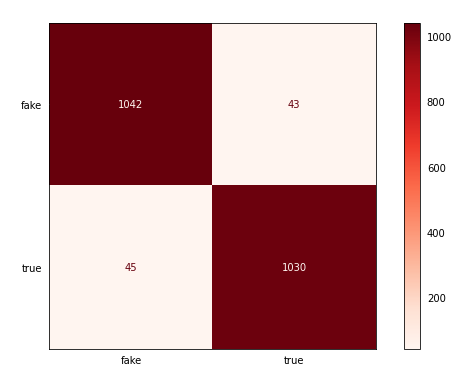

In [33]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix withou Stemming', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Classificador KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_predict) * 100
f1 = f1_score(y_test, y_predict, average = 'macro') * 100

print('Accuracy K-NN from sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score K-NN from sk-learn: {:.2f}%'.format(f1))

Accuracy K-NN from sk-learn: 70.97%
F1 Score K-NN from sk-learn: 69.47%


In [37]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 527,  558],
       [  69, 1006]])

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        fake       0.88      0.49      0.63      1085
        true       0.64      0.94      0.76      1075

    accuracy                           0.71      2160
   macro avg       0.76      0.71      0.69      2160
weighted avg       0.76      0.71      0.69      2160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


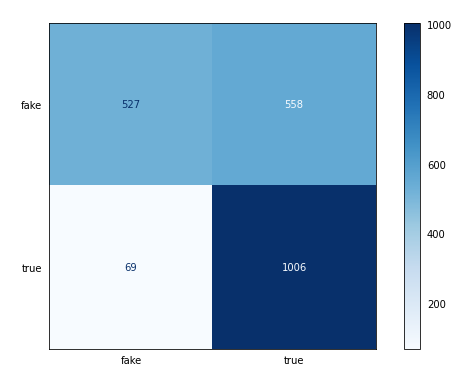

In [39]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Classificador Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

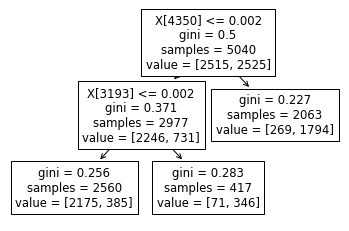

In [41]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [42]:
y_predicted = clf.predict(X_test)
print(y_predicted)

['fake' 'fake' 'true' ... 'fake' 'fake' 'fake']


In [43]:
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100

print('Accuracy Decision Tree from Sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score Decision Tree from Sk-learn: {:.2f}%'.format(f1))

Accuracy Decision Tree from Sk-learn: 85.79%
F1 Score Decision Tree from Sk-learn: 85.79%


In [44]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

        fake       0.86      0.86      0.86      1085
        true       0.86      0.86      0.86      1075

    accuracy                           0.86      2160
   macro avg       0.86      0.86      0.86      2160
weighted avg       0.86      0.86      0.86      2160



In [45]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[933, 152],
       [155, 920]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


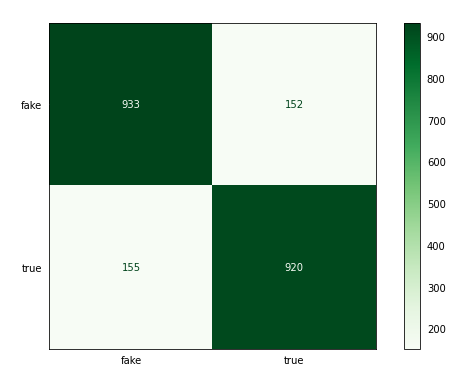

In [46]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [47]:
dados.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [ ]:
x = 'eua coreia sul iniciam manobras aereas conjuntas treinamento aereo conjunto apos coreia norte lancar semana passada missil intercontinental exercicios so vao terminar sexta estados unidos coreia sul iniciaram nesta grande exercicio aereo conjunto poucos dias lancamento missil intercontinental operacao considerada pyongyang provocacao total exercicio cinco dias batizado vigilant ace envolve avioes incluindo cacas raptor mobiliza dezenas milhares soldados durante fim semana jornal estatal rodong denunciou manobras provocacao aberta todos niveis contra coreia norte poderia resultar guerra nuclear qualquer momento afirmou publicacao editorial belicistas americanos marionete fariam bem recordar exercicio militar dirigido contra coreia norte sera tao estupido ato precipita autodestruicao completou ministerio relacoes exteriores acusou sabado governo donald trump querer guerra nuclear qualquer preco simulacao aerea exercicio anual comecou cinco dias teste missil balistico intercontinental icbm supostamente capaz atingir territorio estados unidos momento grande tensao domingo influente senador republicano lindsey graham citou fantasma guerra preventiva acontecer teste nuclear subterraneo sera necessario estar preparado resposta estados unidos advertiu congressista entrevista canal cbs palavras graham complemento declaracoes sabado assessor seguranca nacional donald trump general hr mcmaster durante forum sobre defesa afirmou probabilidade guerra coreia norte aumenta cada dia isolado empobrecido regime realizou seis testes nucleares desde recente setembro coreia norte lancou passada novo tipo missil hwasong capacidade transportar ogiva pesada extragrande pode atingir todo territorio continental estados unidos segundo lider kim teste pais alcancou objetivo estado nuclear pleno direito analistas consideraram recente teste mostra avanco pyongyang tecnologia militar tambem destacaram provavel teste pais utilizou ogiva leve ogiva nuclear pesada missil dificuldades chegar longe tambem demonstraram ceticismo respeito capacidade coreia norte preservar sobrevivencia ogivas reentrada atmosfera programa militar rendeu muitas condenacoes internacionais pyongyang avancou desde chegada poder kim'

vec = tfidf.transform([x])


In [ ]:
clf.predict(vec)

array(['true'], dtype=object)

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC

names = [
         'Nearest-Neighbors',
         'Linear SVM',
         'RBF SVM',
         'Poly SVM',
         'Decision Tree',
         'Random Forest',
         'Neural Net',
         'Adaboost',
]

classifiers = [
               KNeighborsClassifier(3),
               SVC(kernel = 'linear'),
               SVC(gamma = 2, C = 10),
               SVC(kernel = 'poly'),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(),
]

for name, clf in zip(names, classifiers):
  clf.fit(X_train, y_train)
  y_predicted = clf.predict(X_test)
  score = clf.score(X_test, y_test)
  f1 = f1_score(y_test, y_predicted, average = 'macro')
  precision = precision_score(y_test, y_predicted, average = 'macro')
  recall = recall_score(y_test, y_predicted, average = 'macro')
  print('---------------- ' + name + ' ------------------')
  print(name + ' - Accuracy: ' + str(score))
  print(name + ' - F1 Score: ' + str(f1))
  print(name + ' - Precision: ' + str(precision))
  print(name + ' - Recall: ' + str(recall))
  print('------------------------------------------------')

---------------- Nearest-Neighbors ------------------
Nearest-Neighbors - Accuracy: 0.7212962962962963
Nearest-Neighbors - F1 Score: 0.7096836419753086
Nearest-Neighbors - Precision: 0.7657415029868848
Nearest-Neighbors - Recall: 0.7222377022827136
------------------------------------------------
---------------- Linear SVM ------------------
Linear SVM - Accuracy: 0.961574074074074
Linear SVM - F1 Score: 0.9615722208825657
Linear SVM - Precision: 0.9615922146960474
Linear SVM - Recall: 0.9615625334905155
------------------------------------------------
---------------- RBF SVM ------------------
RBF SVM - Accuracy: 0.9518518518518518
RBF SVM - F1 Score: 0.951826038472261
RBF SVM - Precision: 0.9525410628019324
RBF SVM - Recall: 0.9517650841281748
------------------------------------------------
---------------- Poly SVM ------------------
Poly SVM - Accuracy: 0.8949074074074074
Poly SVM - F1 Score: 0.8940791973591519
Poly SVM - Precision: 0.9065677449452378
Poly SVM - Recall: 0.894517

In [50]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear')
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.95833333 0.96527778 0.96666667 0.95972222 0.95069444]


In [51]:
print(scores.mean())

0.960138888888889


### Vectorizando apenas o conjunto de Treino

In [ ]:
X = dados['preprocessed_news']
y = dados['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=500)

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.fit_transform(X_test)

# X = tfidf.fit_transform(X)


In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

### Rodando os modelos agora utilizando os dados com o método Stemming

In [ ]:
dados_copia.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [ ]:
dados_copia['text_stemmed']

0       [kat, abr, diz, vai, coloc, expulsa, mold, nao...
1       [ray, peit, bolsonar, conserv, fak, entrev, da...
2       [reinald, azeved, desmascar, polic, feder, fer...
3       [relatori, assust, bnd, mostr, dinh, publ, bra...
4       [radial, americ, fal, sobr, pt, vend, ilusa, p...
                              ...                        
7195    [jorn, britan, aca, contr, lul, lav, jat, ser,...
7196    [tem, diz, acion, pf, cad, investig, aument, p...
7197    [obstacul, poli, tem, especi, ouv, aval, alem,...
7198    [setembr, boa, noit, aqu, esta, princip, notic...
7199    [envolv, poli, diz, brasil, pres, venezuel, ex...
Name: text_stemmed, Length: 7200, dtype: object

In [ ]:
text_stemmed_join = dados_copia['text_stemmed'].explode()


In [ ]:
dados_copia.head()

,label,preprocessed_news,text_tokenized,text_stemmed
0,fake,katia abreu diz vai colocar expulsao moldura n...,"[katia, abreu, diz, vai, colocar, expulsao, mo...","[kat, abr, diz, vai, coloc, expulsa, mold, nao..."
1,fake,ray peita bolsonaro conservador fake entrevist...,"[ray, peita, bolsonaro, conservador, fake, ent...","[ray, peit, bolsonar, conserv, fak, entrev, da..."
2,fake,reinaldo azevedo desmascarado policia federal ...,"[reinaldo, azevedo, desmascarado, policia, fed...","[reinald, azeved, desmascar, polic, feder, fer..."
3,fake,relatorio assustador bndes mostra dinheiro pub...,"[relatorio, assustador, bndes, mostra, dinheir...","[relatori, assust, bnd, mostr, dinh, publ, bra..."
4,fake,radialista americano fala sobre pt vendem ilus...,"[radialista, americano, fala, sobre, pt, vende...","[radial, americ, fal, sobr, pt, vend, ilusa, p..."


In [19]:
teste_token = ['vai', 'tomar', 'banho', 'coisa','chata']

In [53]:
teste_token

['vai', 'tomar', 'banho', 'coisa', 'chata']

In [20]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(teste_token)

'vai tomar banho coisa chata'

In [55]:
dados_copia['detoken'] = dados_copia['text_stemmed'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [56]:
dados_copia.head()

,label,preprocessed_news,text_tokenized,text_stemmed,detoken
0,fake,katia abreu diz vai colocar expulsao moldura n...,"[katia, abreu, diz, vai, colocar, expulsao, mo...","[kat, abr, diz, vai, coloc, expulsa, mold, nao...",kat abr diz vai coloc expulsa mold nao reclam ...
1,fake,ray peita bolsonaro conservador fake entrevist...,"[ray, peita, bolsonaro, conservador, fake, ent...","[ray, peit, bolsonar, conserv, fak, entrev, da...",ray peit bolsonar conserv fak entrev danil gen...
2,fake,reinaldo azevedo desmascarado policia federal ...,"[reinaldo, azevedo, desmascarado, policia, fed...","[reinald, azeved, desmascar, polic, feder, fer...",reinald azeved desmascar polic feder ferrenh c...
3,fake,relatorio assustador bndes mostra dinheiro pub...,"[relatorio, assustador, bndes, mostra, dinheir...","[relatori, assust, bnd, mostr, dinh, publ, bra...",relatori assust bnd mostr dinh publ brasil jor...
4,fake,radialista americano fala sobre pt vendem ilus...,"[radialista, americano, fala, sobre, pt, vende...","[radial, americ, fal, sobr, pt, vend, ilusa, p...",radial americ fal sobr pt vend ilusa pov brasi...


In [57]:
X = dados_copia['detoken']
y = dados_copia['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=5000)

# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.fit_transform(X_test)

X = tfidf.fit_transform(X)

In [ ]:
tfidf.vocabulary_

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [60]:
print('Total train samples: {}'.format(X_train.shape[0]))
print('Total test samples: {}'.format(X_test.shape[0]))

Total train samples: 5040
Total test samples: 2160


### Aplicando o SVC

In [61]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [62]:
y_pred = clf.predict(X_test)

In [63]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.9546296296296296


In [64]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Accuracy SVM from sk-learn with stemming: {:.2f}%'.format(accuracy))
print('F1 Score SVM from sk-learn with stemming: {:.2f}%'.format(f1))

Accuracy SVM from sk-learn with stemming: 95.46%
F1 Score SVM from sk-learn with stemming: 95.46%


In [65]:
confusion_matrix(y_test, y_pred)

array([[1025,   49],
       [  49, 1037]])

In [66]:
print('--------------Resultados aplicando o método de Stemming----------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados aplicando o método de Stemming----------------

              precision    recall  f1-score   support

        fake       0.95      0.95      0.95      1074
        true       0.95      0.95      0.95      1086

    accuracy                           0.95      2160
   macro avg       0.95      0.95      0.95      2160
weighted avg       0.95      0.95      0.95      2160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


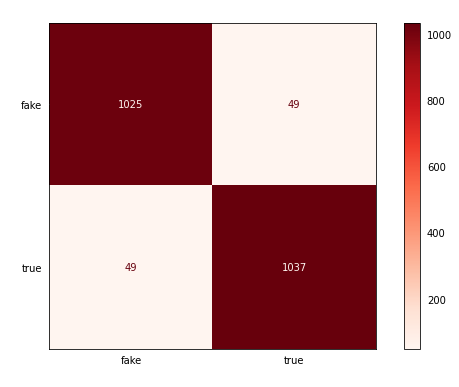

In [67]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Aplicando KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_predict) * 100
f1 = f1_score(y_test, y_predict, average = 'macro') * 100

print('Accuracy K-NN from sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score K-NN from sk-learn: {:.2f}%'.format(f1))

Accuracy K-NN from sk-learn: 70.93%
F1 Score K-NN from sk-learn: 69.15%


In [70]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 507,  567],
       [  61, 1025]])

In [71]:
print('--------------Resultados aplicando o método de Stemming----------------')
print('')
print(classification_report(y_test, y_predict))

--------------Resultados aplicando o método de Stemming----------------

              precision    recall  f1-score   support

        fake       0.89      0.47      0.62      1074
        true       0.64      0.94      0.77      1086

    accuracy                           0.71      2160
   macro avg       0.77      0.71      0.69      2160
weighted avg       0.77      0.71      0.69      2160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


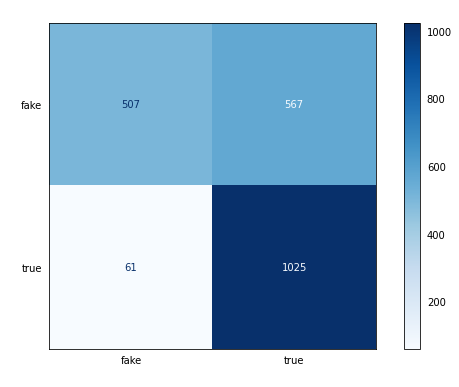

In [72]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Aplicando Decision Tree

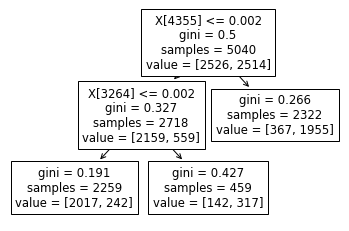

In [73]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [74]:
y_predicted = clf.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100

print('Accuracy Decision Tree from Sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score Decision Tree from Sk-learn: {:.2f}%'.format(f1))

Accuracy Decision Tree from Sk-learn: 86.11%
F1 Score Decision Tree from Sk-learn: 86.07%


In [76]:
print('--------------Resultados aplicando o método de Stemming----------------')
print('')
print(classification_report(y_test, y_predicted))

--------------Resultados aplicando o método de Stemming----------------

              precision    recall  f1-score   support

        fake       0.90      0.81      0.85      1074
        true       0.83      0.91      0.87      1086

    accuracy                           0.86      2160
   macro avg       0.86      0.86      0.86      2160
weighted avg       0.86      0.86      0.86      2160



In [77]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[870, 204],
       [ 96, 990]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


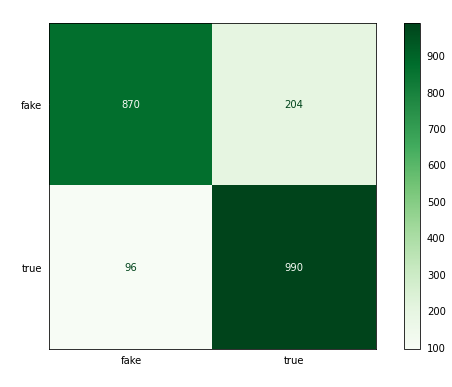

In [78]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Aplicando Diversos Classificadores com a base sob o efeito do algoritmo de Stemming

In [79]:
names = [
         'Nearest-Neighbors',
         'Linear SVM',
         'RBF SVM',
         'Poly SVM',
         'Decision Tree',
         'Random Forest',
         'Neural Net',
         'Adaboost',
]

classifiers = [
               KNeighborsClassifier(3),
               SVC(kernel = 'linear'),
               SVC(gamma = 2, C = 10),
               SVC(kernel = 'poly'),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(),
]

for name, clf in zip(names, classifiers):
  clf.fit(X_train, y_train)
  y_predicted = clf.predict(X_test)
  score = clf.score(X_test, y_test)
  f1 = f1_score(y_test, y_predicted, average = 'macro')
  precision = precision_score(y_test, y_predicted, average = 'macro')
  recall = recall_score(y_test, y_predicted, average = 'macro')
  print('---------------- ' + name + ' ------------------')
  print(name + ' - Accuracy: ' + str(score))
  print(name + ' - F1 Score: ' + str(f1))
  print(name + ' - Precision: ' + str(precision))
  print(name + ' - Recall: ' + str(recall))
  print('------------------------------------------------')

---------------- Nearest-Neighbors ------------------
Nearest-Neighbors - Accuracy: 0.7125
Nearest-Neighbors - F1 Score: 0.6977605811173367
Nearest-Neighbors - Precision: 0.7609122352335852
Nearest-Neighbors - Recall: 0.7112951017006698
------------------------------------------------
---------------- Linear SVM ------------------
Linear SVM - Accuracy: 0.9560185185185185
Linear SVM - F1 Score: 0.9560184336775341
Linear SVM - Precision: 0.9560297533159978
Linear SVM - Recall: 0.9560403098861077
------------------------------------------------
---------------- RBF SVM ------------------
RBF SVM - Accuracy: 0.9458333333333333
RBF SVM - F1 Score: 0.9457955868187531
RBF SVM - Precision: 0.9475181752723387
RBF SVM - Recall: 0.9460091360844471
------------------------------------------------
---------------- Poly SVM ------------------
Poly SVM - Accuracy: 0.899074074074074
Poly SVM - F1 Score: 0.8984598186560675
Poly SVM - Precision: 0.9101682562818847
Poly SVM - Recall: 0.8995339362325998


### Utilizando algoritmo de Lemmatization

In [ ]:
!pip install --upgrade spacy

In [ ]:
!python -m spacy download pt_core_news_sm

In [6]:
nlp = spacy.load('pt_core_news_sm')

In [7]:
from spacy.lang.pt.examples import sentences 
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple está querendo comprar uma startup do Reino Unido por 100 milhões de dólares
Apple PROPN nsubj
está AUX aux
querendo VERB ROOT
comprar VERB xcomp
uma DET det
startup NOUN obj
do ADP case
Reino PROPN nmod
Unido PROPN flat:name
por ADP case
100 NUM obl
milhões NUM flat
de ADP case
dólares NOUN nmod


In [8]:
df_palavras = pd.DataFrame(['amigos', 'amigas', 'amizade', 'carreira', 'carreiras'], columns=['Original'])
df_palavras

,Original
0,amigos
1,amigas
2,amizade
3,carreira
4,carreiras


In [9]:
doc = nlp(str([palavra for palavra in df_palavras['Original']]))

In [10]:
df_palavras['spacy_lemma'] = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
df_palavras

,Original,spacy_lemma
0,amigos,amigo
1,amigas,amiga
2,amizade,amizade
3,carreira,carreira
4,carreiras,carreira


In [11]:
texto = "Jailson viajou usando de aviação para se locomover até Santos para louvar os Santos"

In [12]:
doc = nlp(texto)

In [13]:
def lem_teste(text):
  lemma_list = []
  doc = nlp(text)
  for word in doc:
    lemma_list.append(word.lemma_)
  return lemma_list

In [14]:
lista_armazem_teste = lem_teste('sera que agora deu certo este inferno ?')

In [15]:
lista_armazem_teste 

['serar', 'que', 'agora', 'dar', 'certo', 'este', 'inferno', '?']

In [16]:
dados_copia['lemma'] = dados_copia['preprocessed_news'].apply(lambda x: lem_teste(x))

In [17]:
dados_copia.head()

,label,preprocessed_news,lemma
0,fake,katia abreu diz vai colocar expulsao moldura n...,"[katia, abrer, dizer, ir, colocar, expulsao, m..."
1,fake,ray peita bolsonaro conservador fake entrevist...,"[ray, peitar, bolsonaro, conservador, fake, en..."
2,fake,reinaldo azevedo desmascarado policia federal ...,"[Reinaldo, Azevedo, desmascarar, policia, fede..."
3,fake,relatorio assustador bndes mostra dinheiro pub...,"[relatoriar, assustador, bndes, mostrar, dinhe..."
4,fake,radialista americano fala sobre pt vendem ilus...,"[radialista, americano, falar, sobre, pt, vend..."


In [21]:
dados_copia['detoken_lemma'] = dados_copia['lemma'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [22]:
dados_copia['detoken_lemma'][0]

'katia abrer dizer ir colocar expulsao moldura nao reclamar senador katia abrer dizer Expulsao pmdbr resultar acao cupular atual legenda segundo oportunista amanho ir botar moldura dourar expulsaor porque mao onde vir atestar bom conduta curriculo pessoa expulsar nao servir pai servir pai beneficio proprio dizer katia abrer ue expulsao algo tao bom curriculo tantar choradeira katia sabe motivo provavelmente katiar nao valor pt Partido ja dever absorvir parecer pt gostar katia somente ficar entrincheirar dentro pmdbr rebaixar demais restar katia ficar chorar pitanga todo canto tempo ate momento pt nao cadastrar katia abrer fileira situacao patetico agricultura Dilma'

In [23]:
dados_copia['preprocessed_news'][0]

'katia abreu diz vai colocar expulsao moldura nao reclamar senadora katia abreu disse expulsao pmdb resultado acao cupula atual legenda segundo oportunista amanha vou botar moldura dourada expulsao porque maos onde veio atestado boa conduta curriculo pessoas expulsaram nao servem pais servem pais beneficios proprios disse katia abreu ue expulsao algo tao bom curriculo tanta choradeira katia sabemos motivo provavelmente katia nao valor pt partido ja deveria absorvido parece pt gostava katia somente ficasse entrincheirada dentro pmdb rebaixar demais resta katia ficar chorando pitangas todos cantos tempo ate momento pt nao cadastrou katia abreu fileiras situacao patetica agricultura dilma'

In [29]:
X = dados_copia['detoken_lemma']
y = dados_copia['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
tfidf = TfidfVectorizer(max_features=5000)

# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.fit_transform(X_test)

X = tfidf.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [31]:
print('Total train samples: {}'.format(X_train.shape[0]))
print('Total test samples: {}'.format(X_test.shape[0]))

Total train samples: 5040
Total test samples: 2160


### Aplicando SVC

In [32]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average = 'macro') * 100

print('Accuracy SVM from sk-learn with Lemmatizer: {:.2f}%'.format(accuracy))
print('F1 Score SVM from sk-learn with Lemmatizer: {:.2f}%'.format(f1))

Accuracy SVM from sk-learn with Lemmatizer: 95.97%
F1 Score SVM from sk-learn with Lemmatizer: 95.97%


In [35]:
confusion_matrix(y_test, y_pred)

array([[1031,   43],
       [  44, 1042]])

In [36]:
print('--------------Resultados aplicando o método de Lemmatização---------------')
print('')
print(classification_report(y_test, y_pred))

--------------Resultados aplicando o método de Lemmatização---------------

              precision    recall  f1-score   support

        fake       0.96      0.96      0.96      1074
        true       0.96      0.96      0.96      1086

    accuracy                           0.96      2160
   macro avg       0.96      0.96      0.96      2160
weighted avg       0.96      0.96      0.96      2160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


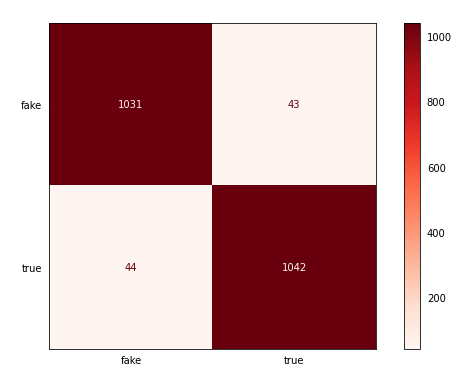

In [37]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Aplicando KNN

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_predict) * 100
f1 = f1_score(y_test, y_predict, average = 'macro') * 100

print('Accuracy K-NN from sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score K-NN from sk-learn: {:.2f}%'.format(f1))

Accuracy K-NN from sk-learn: 72.18%
F1 Score K-NN from sk-learn: 70.55%


In [40]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 526,  548],
       [  53, 1033]])

In [43]:
print('--------------Resultados aplicando o método de Lemmatização----------------')
print('')
print(classification_report(y_test, y_predict))

--------------Resultados aplicando o método de Lemmatização----------------

              precision    recall  f1-score   support

        fake       0.91      0.49      0.64      1074
        true       0.65      0.95      0.77      1086

    accuracy                           0.72      2160
   macro avg       0.78      0.72      0.71      2160
weighted avg       0.78      0.72      0.71      2160



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


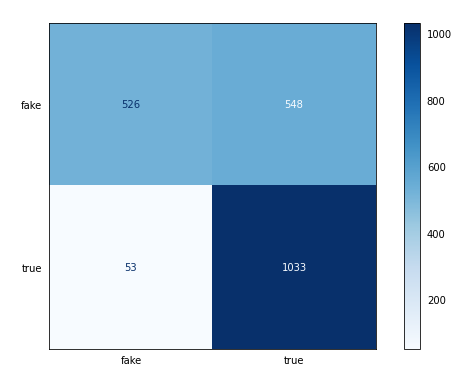

In [41]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Aplicando Decision Tree

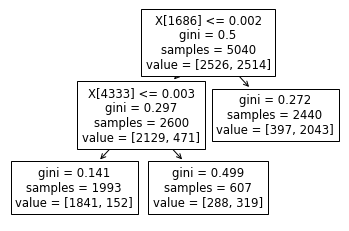

In [44]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [45]:
y_predicted = clf.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100

print('Accuracy Decision Tree from Sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score Decision Tree from Sk-learn: {:.2f}%'.format(f1))

Accuracy Decision Tree from Sk-learn: 84.26%
F1 Score Decision Tree from Sk-learn: 84.07%


In [47]:
print('--------------Resultados aplicando o método de Lemmatização----------------')
print('')
print(classification_report(y_test, y_predicted))

--------------Resultados aplicando o método de Lemmatização----------------

              precision    recall  f1-score   support

        fake       0.93      0.74      0.82      1074
        true       0.78      0.95      0.86      1086

    accuracy                           0.84      2160
   macro avg       0.86      0.84      0.84      2160
weighted avg       0.86      0.84      0.84      2160



In [49]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 791,  283],
       [  57, 1029]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


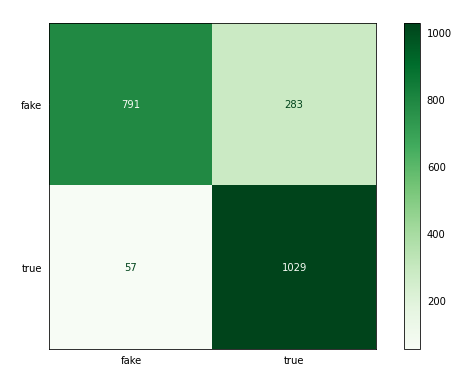

In [48]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Aplicando Diversos Classificadores com a base sob o efeito do algoritmo de Lemmatização

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC

names = [
         'Nearest-Neighbors',
         'Linear SVM',
         'RBF SVM',
         'Poly SVM',
         'Decision Tree',
         'Random Forest',
         'Neural Net',
         'Adaboost',
]

classifiers = [
               KNeighborsClassifier(3),
               SVC(kernel = 'linear'),
               SVC(gamma = 2, C = 10),
               SVC(kernel = 'poly'),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(),
]

for name, clf in zip(names, classifiers):
  clf.fit(X_train, y_train)
  y_predicted = clf.predict(X_test)
  score = clf.score(X_test, y_test)
  f1 = f1_score(y_test, y_predicted, average = 'macro')
  precision = precision_score(y_test, y_predicted, average = 'macro')
  recall = recall_score(y_test, y_predicted, average = 'macro')
  print('---------------- ' + name + ' ------------------')
  print(name + ' - Accuracy: ' + str(score))
  print(name + ' - F1 Score: ' + str(f1))
  print(name + ' - Precision: ' + str(precision))
  print(name + ' - Recall: ' + str(recall))
  print('------------------------------------------------')

---------------- Nearest-Neighbors ------------------
Nearest-Neighbors - Accuracy: 0.7212962962962963
Nearest-Neighbors - F1 Score: 0.7065630652912525
Nearest-Neighbors - Precision: 0.7736769604101007
Nearest-Neighbors - Recall: 0.7200736648250461
------------------------------------------------
---------------- Linear SVM ------------------
Linear SVM - Accuracy: 0.9592592592592593
Linear SVM - F1 Score: 0.9592583860250777
Linear SVM - Precision: 0.9592552709913716
Linear SVM - Recall: 0.9592631459818719
------------------------------------------------
---------------- RBF SVM ------------------
RBF SVM - Accuracy: 0.9564814814814815
RBF SVM - F1 Score: 0.9564665523156088
RBF SVM - Precision: 0.9574296305712352
RBF SVM - Recall: 0.9566138872598948
------------------------------------------------
---------------- Poly SVM ------------------
Poly SVM - Accuracy: 0.9027777777777778
Poly SVM - F1 Score: 0.902214066687592
Poly SVM - Precision: 0.9134593406593406
Poly SVM - Recall: 0.90322